# Lane Detection Use Edge Detection and RANSAC

Import all necessary libraries.

In [1]:
from time import time
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

### Part 1 - Image Pre-processing

Display the original example image.

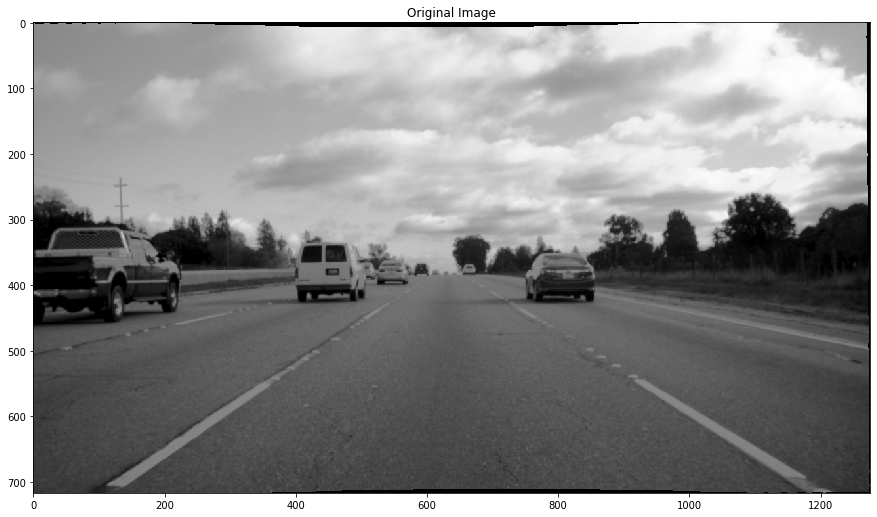

In [2]:
img = io.imread('example_image1.png', as_gray=True) # shape = (717,1276)
plt.imshow(img)
plt.title('Original Image')
plt.show()

 Notice that the above image has some noisy borders which is likely to affect lane detection. Let's prune them out.

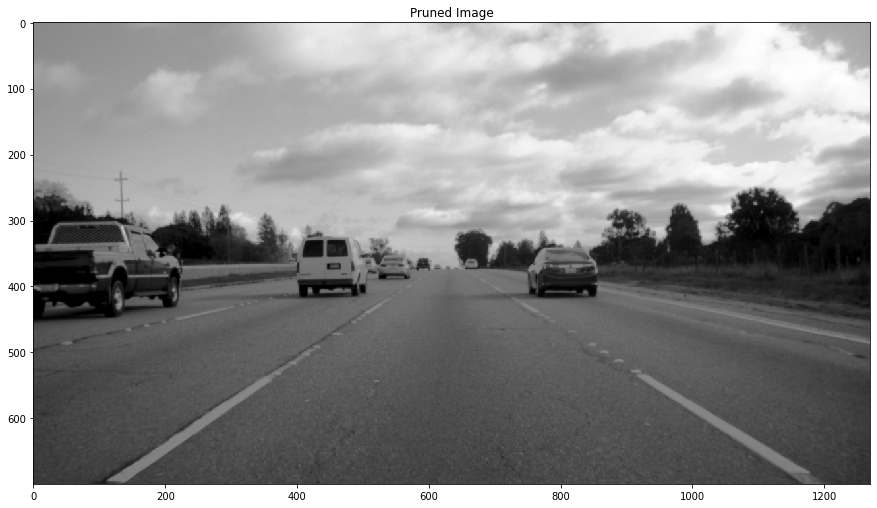

In [3]:
img_pruned = img[10:710,:1270] # shape = (700,1270)
plt.imshow(img_pruned)
plt.title('Pruned Image')
plt.show()

### Part 2 - Edge Detection

### Part 2 - Edge Detection

In [4]:
from functions import smoothing


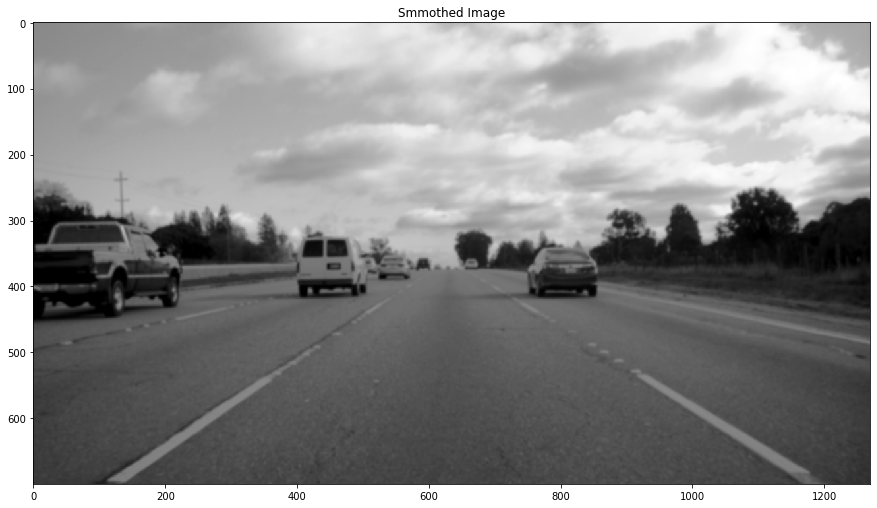

In [5]:
smoothed_img = smoothing(img_pruned, 5, 1.4)
plt.imshow(smoothed_img)
plt.title('Smmothed Image')
plt.show()

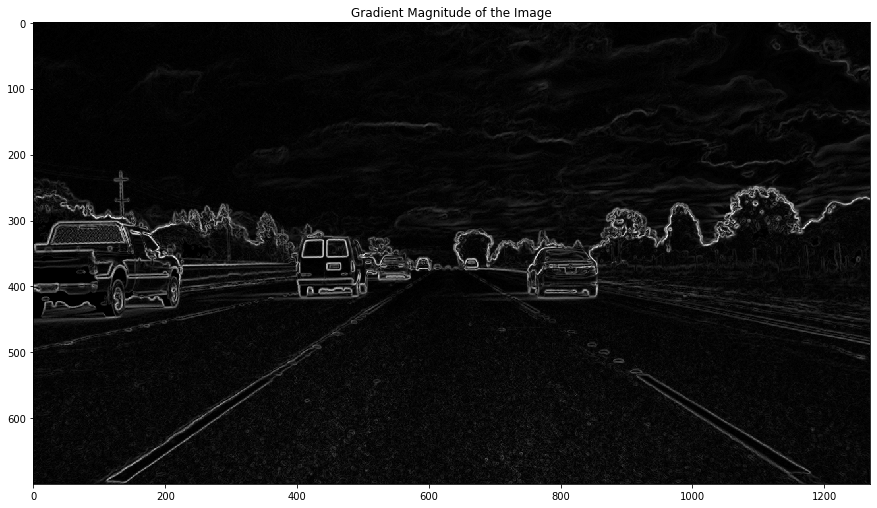

In [6]:
from functions import gradient
gradient, theta = gradient(img_pruned, 5, 1.4)
plt.imshow(gradient)
plt.title('Gradient Magnitude of the Image')
plt.show()

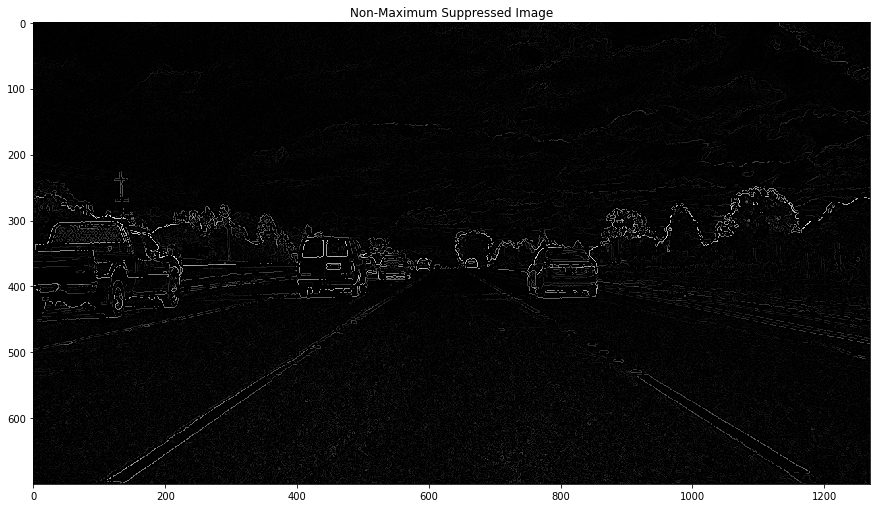

In [7]:
from functions import NMS
NMS_img = NMS(img_pruned, 5, 1.4)
plt.imshow(NMS_img)
plt.title('Non-Maximum Suppressed Image')
plt.show()

In [8]:
print(np.max(NMS_img))

53.415821626181135


### Part 3 - 


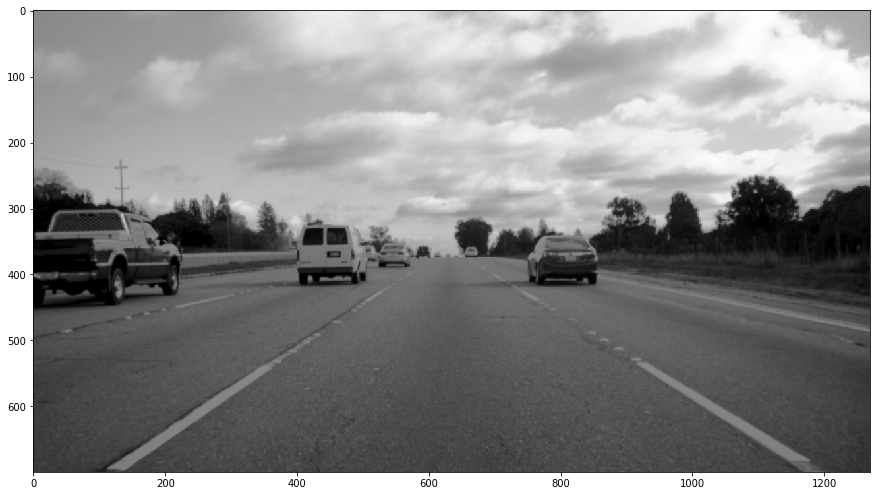

In [9]:
img_pruned = img[10:710,:1270] # shape = (700,1270)
plt.imshow(img_pruned)
img_pruned_copy=img_pruned.copy()

### old code - 


In [11]:
img_pruned=img_pruned_copy[350:450,:]
src=img_pruned
dst = cv.Canny(src, 30, 100, None, 3)
cv.imshow("edges",dst)

# Copy edges to the images that will display the results in BGR
cdstP =cv.cvtColor(dst, cv.COLOR_GRAY2BGR)


linesP = cv.HoughLinesP(dst, 2, np.pi / 180, 40, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        if abs((linesP[i][0][3]-linesP[i][0][1])/(linesP[i][0][2]-linesP[i][0][0]))<0.05:
            continue
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
from functions import RANSAC_VP
#print(np.shape(linesP))
VP=RANSAC_VP(linesP)
print(VP)

cv.circle(cdstP, (round(VP[0]),round(VP[1])), 6, (0,255,0), 5 )

cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)


cv.waitKey()

dbg
0.5365853658536586
dbg
0.5609756097560976
dbg
0.5853658536585366
[629.  12.   1.]


-1

In [ ]:
'''
NMS_img= cv.Canny(img_pruned, 20, 60, None, 3)
#plt.imshow(NMS_img)
#plt.title('Non-Maximum Suppressed Image')
#plt.show()
lines = cv.HoughLines(NMS_img, 1, np.pi / 180, 150, None, 0, 0)
#print('lines')
#print(lines)

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(NMS_img, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
            
#cv.imshow("Source", img_pruned)     
cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", NMS_img)
'''
'''
    lines = cv.HoughLines(dst, 4, np.pi / 180, 120, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
'''

In [ ]:
#分三层 边界分别在  300 400 500

layer= np.array([600, 475,350])

for i in range( np.shape(layer)[0]):
    if(i!= 0):
        img_pruned=img_pruned_copy[layer[i]:layer[i-1],:]
    else:
        img_pruned=img_pruned_copy[layer[i]:,:]
    src=img_pruned
    dst = cv.Canny(src, 30, 100, None, 3)
    cv.imshow("edges",dst)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    
    linesP = cv.HoughLinesP(dst, 2, np.pi / 180, 40, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            if abs((linesP[i][0][3]-linesP[i][0][1])/(linesP[i][0][2]-linesP[i][0][0]))<0.05:
                continue
            l = linesP[i][0]
            print(l)
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
   
    #cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
    cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
    
    cv.waitKey()

    


In [ ]:
from functions import convert_homogenous_line
from functions import line_dist

In [ ]:
line1= np.array([1,4,5,3])
line1= convert_homogenous_line(line1)
line2= np.array([1.5,0,5,3])
line2= convert_homogenous_line(line2)
pt=np.cross(line1,line2)
pt/=pt[-1]

line3= np.array([1.5,0,1,4])
line3= convert_homogenous_line(line3)

line_dist(line3,[5,3])
